<a href="https://colab.research.google.com/github/LilZulf/Binary-Sentiment-Analysis-on-IMDB-50k-Dataset/blob/main/NaturalLanguageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Sentiment Analysis on IMDB 50k Dataset

## Course of Action
The overall strategy involves building a text classification pipeline based on deep learning, specifically using a neural network suitable for sequence data. The steps include:

- Loading and inspecting the dataset.
- Preprocessing the textual data to prepare it for training.
- Building and training a deep learning model (LSTM) using TensorFlow.
- Evaluating the model's performance using accuracy and classification metrics.

Additionally, the performance will be visualized and interpreted using learning curves and classification reports.

## Preprocessing Steps
To prepare the data for modeling, several preprocessing steps were applied:

- **Label Encoding**: Sentiment labels ("positive" and "negative") were converted into binary format (1 and 0).
- **Tokenization**: Reviews were tokenized into integer sequences using Keras' `Tokenizer`, restricting the vocabulary to the top 10,000 most frequent words.
- **Padding**: All sequences were padded or truncated to a uniform length of 500 tokens to ensure consistent input shape for the neural network.

These preprocessing steps transform the raw text into a numerical format that deep learning models can process efficiently.

## Proposed Model
For this task, an **LSTM (Long Short-Term Memory)** network was selected due to its capability to effectively capture contextual dependencies in sequential data such as text. The model architecture includes:

- An **Embedding layer** to learn word representations.
- A **single LSTM layer** with 64 units to process sequences.
- A **Dense output layer** with sigmoid activation for binary classification.

LSTM is well-suited for sentiment analysis because it can remember long-term dependencies and understand the order of words, which is crucial for interpreting the meaning of sentences.

1. Initial Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import classification_report

2. Mount to google drive to access dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Load CSV

In [3]:
# Load CSV
import pandas as pd

file_path = '/content/drive/My Drive/dataset/imdb/IMDB Dataset.csv'
df = pd.read_csv(file_path)

# Cek data
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


4. Preprocessing and Model Training

In [4]:
# 1. Encode Label
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# 2. Split Dataset
from sklearn.model_selection import train_test_split

X = df['review'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

5. Tokenization

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer
max_words = 10000
max_len = 500

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

6. Build LSTM Model

In [6]:
def build_lstm_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, 128, input_length=max_len),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_lstm_model()

history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 342s 340ms/step - accuracy: 0.7371 - loss: 0.5230 - val_accuracy: 0.8273 - val_loss: 0.4138
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 392s 350ms/step - accuracy: 0.8649 - loss: 0.3276 - val_accuracy: 0.8945 - val_loss: 0.2546
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 372s 340ms/step - accuracy: 0.9362 - loss: 0.1749 - val_accuracy: 0.8965 - val_loss: 0.2528
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 399s 357ms/step - accuracy: 0.9643 - loss: 0.1083 - val_accuracy: 0.8925 - val_loss: 0.3257
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 335s 335ms/step - accuracy: 0.9790 - loss: 0.0681 - val_accuracy: 0.8884 - val_loss: 0.3807


7. Model Evaluation

In [8]:
# Evaluasi akurasi
loss, acc = model.evaluate(X_test_pad, y_test)
print(f"Testing Accuration: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8926 - loss: 0.3629
Testing Accuration: 0.8909


8. Classification Report

In [9]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4961
           1       0.91      0.87      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



9. Plot Accuracy vs Epoch

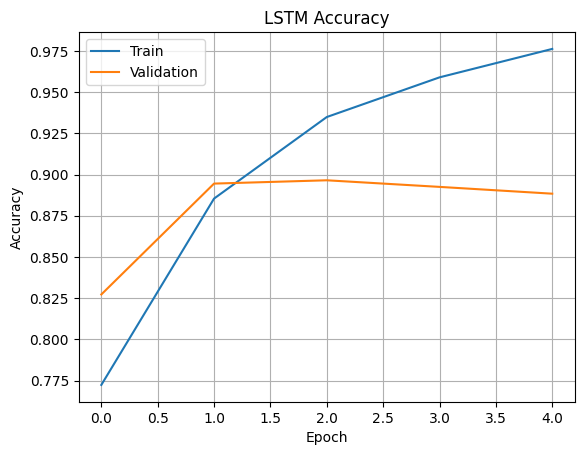

In [10]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history, "LSTM Accuracy")


# Conclusion

The LSTM-based sentiment analysis model achieved an overall accuracy of 89% on the test dataset, demonstrating strong performance in classifying positive and negative movie reviews.

From the classification report:

The model performed equally well on both classes, with an F1-score of 0.89 for both positive and negative sentiments.

Precision and recall were well-balanced:

For class 0 (negative): Precision = 0.87, Recall = 0.91

For class 1 (positive): Precision = 0.91, Recall = 0.87

The training graph shows that:

The model's training accuracy increased steadily across epochs.

However, the validation accuracy plateaued after epoch 2 and slightly declined, suggesting a risk of overfitting if training continues without regularization or early stopping.

In summary, the LSTM model is effective for binary sentiment classification, but further optimization (e.g., dropout, tuning epochs, or regularization techniques) may help improve generalization on unseen data.

Future Work :
Compare performance with GRU and CNN models.

Tune learning rate, batch size, and other hyperparameters.

Apply pretrained models like BERT for better accuracy.


